<a href="https://colab.research.google.com/github/bmurmann/Ngspice-on-Colab/blob/main/GF180MCU_VGS_sweep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GF180MCU V<sub>GS</sub> sweep

Tool setup adopted from @proppy (see this [Colab notebook](https://colab.research.google.com/gist/proppy/a0c5ed3e28e942f1621200dcf67bad5a/sky130-pyspice-playground.ipynb#scrollTo=q0XHBAt1jGmQ))

# Tool setup

In [1]:
#@title Bootstrap conda environment {display-mode: "form"}
#@markdown - Click the ▷ button to initialize the conda-eda environment.
#@markdown - Wait for the installation to complete
#@markdown - Click the `Restart Kernel` button.
%pip install -q https://github.com/conda-incubator/condacolab/archive/28521d7c5c494dd6377bb072d97592e30c44609c.tar.gz
import condacolab

condacolab.install(restart_kernel=False)

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
✨🍰✨ Everything looks OK!


### Install dependencies

- Wait for the kernel restart to complete.
- Click the ▷ button below to run the hidden cells to complete the setup.

In [2]:
%%writefile environment.yml
channels:
  - conda-forge
dependencies:
  - ngspice

Overwriting environment.yml


In [3]:
!mamba env update -n base -f environment.yml

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.3s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.4s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.5s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.6s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.7s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.8s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.9s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.0s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.2s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.3s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.4s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.5s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.6s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.7s
conda-forge/linux-64  

In [4]:
!git clone https://github.com/google/globalfoundries-pdk-libs-gf180mcu_fd_pr.git

fatal: destination path 'globalfoundries-pdk-libs-gf180mcu_fd_pr' already exists and is not an empty directory.


# Simulation

In [5]:
%%writefile .spiceinit
set ngbehavior=hs

Overwriting .spiceinit


In [6]:
%%writefile netlist.spice
* PMOS VGS sweep

.include "globalfoundries-pdk-libs-gf180mcu_fd_pr/models/ngspice/design.ngspice"
.lib "globalfoundries-pdk-libs-gf180mcu_fd_pr/models/ngspice/sm141064.ngspice" typical

X1 vdp vgp 0 vbp pmos_3p3 w=10u l=0.5u
vsdp     0  vdp        dc 0.9  
vsgp     0  vgp        dc 0    
vsbp     0  vbp        dc 0
*.op
*.option post brief
.end

.control
save all @m.x1.m0[id] @m.x1.m0[gm]
dc vsgp 0 1.8 0.01
display
wrdata output.txt @m.x1.m0[gm] @m.x1.m0[id]
.endc

Overwriting netlist.spice


In [7]:
!ngspice -b netlist.spice


Note: Compatibility modes selected: hs



Circuit: * pmos vgs sweep

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 181
Here are the vectors currently active:

Title: * pmos vgs sweep
Name: dc1 (DC transfer characteristic)
Date: Thu Jan  5 23:29:18  2023

    @m.x1.m0[gm]        : admittance, real, 181 long
    @m.x1.m0[id]        : current, real, 181 long
    v-sweep             : voltage, real, 181 long [default scale]
    vbp                 : voltage, real, 181 long
    vdp                 : voltage, real, 181 long
    vgp                 : voltage, real, 181 long
    vsbp#branch         : current, real, 181 long
    vsdp#branch         : current, real, 181 long
    vsgp#branch         : current, real, 181 long
Note: No ".plot", ".print", or ".fourier" lines; no simulations run


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("output.txt", delim_whitespace=True, header=None)
df.columns = ["vsg", "gm", "vsg1", "id"]
df['gm_id'] = df['gm']/df['id']
df

,vsg,gm,vsg1,id,gm_id
0,0.00,5.830641e-14,0.00,2.154477e-15,27.062912
1,0.01,7.642705e-14,0.01,2.824062e-15,27.062806
2,0.02,1.001791e-13,0.02,3.701743e-15,27.062685
3,0.03,1.313126e-13,0.03,4.852190e-15,27.062546
4,0.04,1.721213e-13,0.04,6.360168e-15,27.062386
...,...,...,...,...,...
176,1.76,4.882859e-04,1.76,2.872722e-04,1.699733
177,1.77,4.901726e-04,1.77,2.921646e-04,1.677728
178,1.78,4.919483e-04,1.78,2.970753e-04,1.655972
179,1.79,4.936087e-04,1.79,3.020031e-04,1.634449


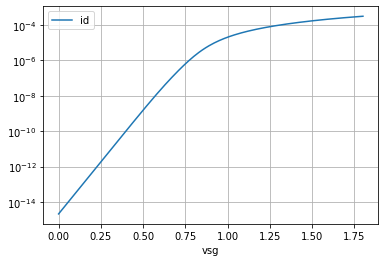

In [9]:
df.plot(x="vsg", y="id", logy=True, grid=True)
plt.show()

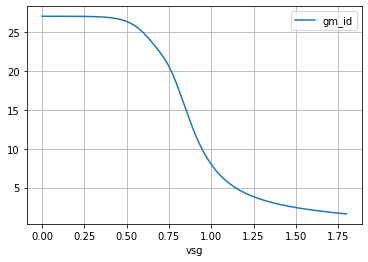

In [10]:
df.plot(x="vsg", y="gm_id", grid=True)
plt.show()